# Aircraft Flight Data Analysis

### Aircraft data from Nov 7, 2022 to Jan 9, 2023, showing the number of planes flying in and around the Antelope Valley, California. The data was collected using an RTL-SDR dongle picking up over the air ADS-B. Using the RTL-SDR data, it did registration queries on with the FAA per each flight. Those queries provided owner information (corporation, expiration date, registration city/state). Data was also collected through other queries to fingerprint each flight to a model and manufacturer. 

- Defining the problem statement
- Collecting the data
- Exploratory data analysis

## Defining the problem statment
In this project, we study the data which is in tabular format using various Python libraries like Pandas, Numpy, Matplotlib and Seaborn.

We study different columns of the table and try to co-relate them with others and find a relation between those two.

## Collecting the data
#### Import the required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines_df = pd.read_csv(r'C:\Users\siddh\Documents\Python_project\archive\aircraft-data_nov_dec.csv')

In [3]:
airlines_df

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,mph,spotted
0,SIS300,N300NJ,-118.213,34.5823,20175,BOMBARDIER INC,BD-100-1A10,1/31/24,PUNTA PACIFICO I LLC,BAKERSFIELD,CALIFORNIA,474,11-07-2022
1,UAL1434,N67501,-117.937,34.6038,36700,BOEING,737-9,4/30/24,UNITED AIRLINES INC,CHICAGO,ILLINOIS,523,11-07-2022
2,SWA3287,N483WN,-118.035,34.6345,13225,BOEING,737-7H4,8/31/24,SOUTHWEST AIRLINES CO,DALLAS,TEXAS,380,11-07-2022
3,AAL2059,N660AW,-118.075,34.4643,33750,AIRBUS INDUSTRIE,A320-232,2/29/24,US BANK NA TRUSTEE,BOSTON,MASSACHUSETTS,527,11-07-2022
4,N84PJ,N84PJ,-117.756,34.6002,34725,DASSAULT,FALCON 2000EX,12/31/24,HAMPTON AIRWAYS INC,SELLERSBURG,INDIANA,525,11-07-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30942,DAL2110,N3751B,-118.534,34.3272,29275,BOEING,737-832,12/31/23,DELTA AIR LINES INC,ATLANTA,GEORGIA,493,01-09-2023
30943,ATN3324,N367AZ,-118.271,34.4084,13650,BOEING,767-319,7/31/24,CARGO AIRCRAFT MANAGEMENT INC,WILMINGTON,OHIO,460,01-09-2023
30944,N313V,N313V,-118.251,34.5448,18350,BOMBARDIER INC,BD-100-1A10,3/31/24,CLYDE COMPANIES INC,OREM,UTAH,460,01-09-2023
30945,ASA1106,N453AS,-118.105,34.6315,22425,BOEING,737-990ER,1/31/26,ALASKA AIRLINES INC,SEATAC,WASHINGTON,444,01-09-2023


#### About the Dataset

The various features of the dataset are explained below:

1. flight - Flight # or Callsign of aircraft
2. tail_number - FAA registration
3. long - Longitude of aircraft at time of scan
4. lat - Latitude of aircraft at time of scan
5. alt - Altitude of aircraft at time of scan
6. manufacturer - Manufacturer of aircraft
7. model - Model of aircraft
8. reg_expiration - Aircraft FAA registration expiration
9. reg_owner - Public registered owner
10. reg_city - Public registered city
11. reg_state - Public registered state
12. mph - miles per hour at the time of scan
13. spotted - Date at the time of scan


In [4]:
# lets see an overall overview of the dataset

airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30947 entries, 0 to 30946
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight          30915 non-null  object 
 1   tail_number     30947 non-null  object 
 2   long            30947 non-null  float64
 3   lat             30947 non-null  float64
 4   alt             30947 non-null  int64  
 5   manufacturer    30185 non-null  object 
 6   model           30185 non-null  object 
 7   reg_expiration  29958 non-null  object 
 8   reg_owner       30184 non-null  object 
 9   reg_city        30340 non-null  object 
 10  reg_state       30337 non-null  object 
 11  mph             30947 non-null  int64  
 12  spotted         30947 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.1+ MB


In [5]:
#lets breakdown a little more!

airlines_df.describe()

,long,lat,alt,mph
count,30947.000000,30947.000000,30947.000000,30947.000000
mean,-118.162780,34.612216,24676.890329,465.574272
std,0.336949,0.160019,10827.895719,63.122105
min,-119.302000,33.975100,2575.000000,90.000000
25%,-118.392000,34.513200,16325.000000,460.000000
50%,-118.165000,34.605600,25300.000000,460.000000
75%,-117.931000,34.697200,34500.000000,513.000000
max,-116.906000,35.336000,124750.000000,615.000000


In [6]:
airlines_df.nunique()

flight            7289
tail_number       8475
long              1803
lat               7206
alt               1729
manufacturer       231
model              692
reg_expiration      48
reg_owner         3457
reg_city          1042
reg_state           50
mph                220
spotted            382
dtype: int64

## Q1. Which Manufacturer(s) are recurring the most in the Scan results  ?


In [7]:
manufacturer_count_df = airlines_df.groupby(['manufacturer'])['model'].count().reset_index(name = 'count').sort_values(['count'], ascending = False).head(50)
manufacturer_count_df

,manufacturer,count
37,BOEING,9837
55,CESSNA,2551
8,AIRBUS,2371
40,BOMBARDIER INC,2354
94,EMBRAER S A,1716
14,AIRBUS INDUSTRIE,1290
120,GULFSTREAM AEROSPACE,1150
91,EMBRAER,1061
217,TEXTRON AVIATION INC,945
30,BEECH,583


From the result, we can see that BOEING Manufactured planes are the most scanned ones!!


## Q2. Which aircraft are in-flight with the highest speed and over which city ?

In [8]:
airlines_df.sort_values(['mph'], ascending = False).head(50)

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,mph,spotted
24426,N178AS,N178AS,-117.826,34.6917,35100,CESSNA,750,8/31/23,ALPHA SIERRA AVIATION LLC,GLENDALE,CALIFORNIA,615,12/23/22 1
1173,DCM2217,N982DW,-117.821,34.6202,36725,CESSNA,750,12/31/25,RAVEN AVIATION LLC,FRESNO,CALIFORNIA,605,11-09-2022
15768,N600TX,N600TX,-118.016,34.6183,41100,GULFSTREAM AEROSPACE CORP,GVII-G600,12/31/24,KENNEDY RD LLC,PALO ALTO,CALIFORNIA,603,12-07-2022
381,NaN,N661GT,-117.813,34.5637,38650,GULFSTREAM AEROSPACE CORP,GVI (G650ER),6/30/25,RHYS VINEYARDS LLC,SAN JOSE,CALIFORNIA,603,11-08-2022
11252,GAJ904,N904UP,-118.126,34.5152,33425,CESSNA,750,3/31/25,WHEELS UP PARTNERS LLC,NEW YORK,NEW YORK,603,11/28/22 1
7116,GAJ904,N904UP,-118.559,34.8663,36775,CESSNA,750,3/31/25,WHEELS UP PARTNERS LLC,NEW YORK,NEW YORK,603,11/20/22 1
5334,DCM2217,N982DW,-118.593,34.8543,32800,CESSNA,750,12/31/25,RAVEN AVIATION LLC,FRESNO,CALIFORNIA,603,11/17/22 1
2128,N821WH,N821WH,-118.592,34.5824,37725,GULFSTREAM AEROSPACE CORP,GVII-G500,2/29/24,ALOHA AVIATION LLC,PEORIA,ILLINOIS,603,11-11-2022
12942,N10HH,N10HH,-118.580,34.4673,28750,TEXTRON AVIATION INC,750,2/29/24,TRANSWESTERN TRANSPORTS LLC,BAKER,MONTANA,601,12-01-2022
27026,N716TV,N716TV,-118.700,34.8826,33525,BOMBARDIER INC,BD-700-1A10,1/31/24,TVPX AIRCRAFT SOLUTIONS INC TRUSTEE,NORTH SALT LAKE,UTAH,601,12/30/22 1


As you can see, Manufacturer CESSNA of Model No. 750 is flying with highest speed of 615 mph over city GLENDALE !!

## Q3. Which Aircrafts are at the highest altitude at the time of scan and when ?

In [9]:
airlines_df.sort_values(['alt'], ascending = False).head(50)

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,mph,spotted
693,UAL622,N57864,-117.674,34.3603,124750,BOEING,757-33N,1/31/25,WELLS FARGO TRUST CO NA TRUSTEE,SALT LAKE CITY,UTAH,493,11-09-2022
20590,EDG74,N805FT,-117.718,34.7061,77475,GULFSTREAM AEROSPACE,G-IV,9/30/24,SOFODAN LLC,LOS ANGELES,CALIFORNIA,502,12/16/22 1
20013,NASA806,N806NA,-118.870,34.5509,63150,LOCKHEED,ER-2,8/31/23,NASA NEIL A ARMSTRONG FLIGHT RESEARCH CENTER,EDWARDS,CALIFORNIA,460,12/15/22 1
19805,NASA806,N806NA,-118.197,34.9284,63150,LOCKHEED,ER-2,8/31/23,NASA NEIL A ARMSTRONG FLIGHT RESEARCH CENTER,EDWARDS,CALIFORNIA,460,12/15/22 1
997,N905SA,N905SA,-118.347,34.5680,61625,BOMBARDIER INC,CL-600-2B16(CL-604),9/30/23,SIERRA AVIATION INC,KANSAS CITY,MISSOURI,320,11-09-2022
15765,SCAT41,N281PR,-117.710,34.5405,51400,SCALED COMPOSITES LLC,281,9/30/24,SCALED COMPOSITES LLC,MOJAVE,CALIFORNIA,460,12-07-2022
16428,SCAT41,N281PR,-117.948,34.7785,51325,SCALED COMPOSITES LLC,281,9/30/24,SCALED COMPOSITES LLC,MOJAVE,CALIFORNIA,460,12-08-2022
15786,SCAT41,N281PR,-117.751,34.5708,51300,SCALED COMPOSITES LLC,281,9/30/24,SCALED COMPOSITES LLC,MOJAVE,CALIFORNIA,460,12-07-2022
19433,SCAT41,N281PR,-117.667,34.5473,51250,SCALED COMPOSITES LLC,281,9/30/24,SCALED COMPOSITES LLC,MOJAVE,CALIFORNIA,460,12/14/22 1
16395,SCAT41,N281PR,-118.004,34.7764,51150,SCALED COMPOSITES LLC,281,9/30/24,SCALED COMPOSITES LLC,MOJAVE,CALIFORNIA,460,12-08-2022


BOEING is at an altitude of 1,24,750 ft over the SALT LAKE CITY on 11th September 2022

## Now, lets take a random sample data from main Dataframe to analyze it a bit more !

In [10]:
airline20_df = airlines_df.sample(20)

In [11]:
airline20_df

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,mph,spotted
16133,SWA176,N967WN,-117.602,34.8306,41425,BOEING,737-7H4,10/31/23,SOUTHWEST AIRLINES CO,DALLAS,TEXAS,525,12-08-2022
5194,N24AC,N24AC,-118.306,34.6298,41875,BOMBARDIER INC,BD-100-1A10,5/31/25,WELCOME GROVE LLC,WEST SACRAMENTO,CALIFORNIA,532,11/17/22 1
6404,AAL1164,N802NN,-117.573,34.7688,35450,BOEING,737-823,2/29/24,WILMINGTON TRUST CO TRUSTEE,WILMINGTON,DELAWARE,525,11/19/22 1
1357,N781KB,N781KB,-117.573,34.5095,41850,TEXTRON AVIATION INC,560XL,8/31/23,IDM APARTMENTS LLC,VANCOUVER,WASHINGTON,460,11-10-2022
19463,72291,N1009ZJ,-118.125,34.6179,6925,NaN,NaN,NaN,NaN,NaN,NaN,460,12/14/22 1
7941,SWA1663,N7874B,-118.681,34.7325,35675,BOEING,737-7Q8,12/31/24,WILMINGTON TRUST CO TRUSTEE,WILMINGTON,DELAWARE,460,11/22/22 8
21064,N410PT,N410PT,-117.661,34.5493,30625,TEXTRON AVIATION INC,525C,11/30/24,PACT 33 LLC,WESTLAKE,TEXAS,437,12/17/22 1
5099,SKW4691,N143SY,-118.043,34.4380,35875,EMBRAER S A,ERJ 170-200 LR,5/31/24,SKYWEST AIRLINES INC,ST GEORGE,UTAH,513,11/17/22 9
20715,UAL372,N38268,-117.886,34.3895,37325,BOEING,737-824,6/30/25,UMB BANK NA TRUSTEE,SALT LAKE CITY,UTAH,520,12/16/22 1
24940,N543TC,N543TC,-118.271,34.8084,11650,TEXTRON AVIATION INC,208,1/31/25,WONDERFUL ORCHARDS LLC,SHAFTER,CALIFORNIA,460,12/25/22 1


## Q4. Can you show when and which Manufactured Aircraft are in-flight over which City with the help of a graph ?

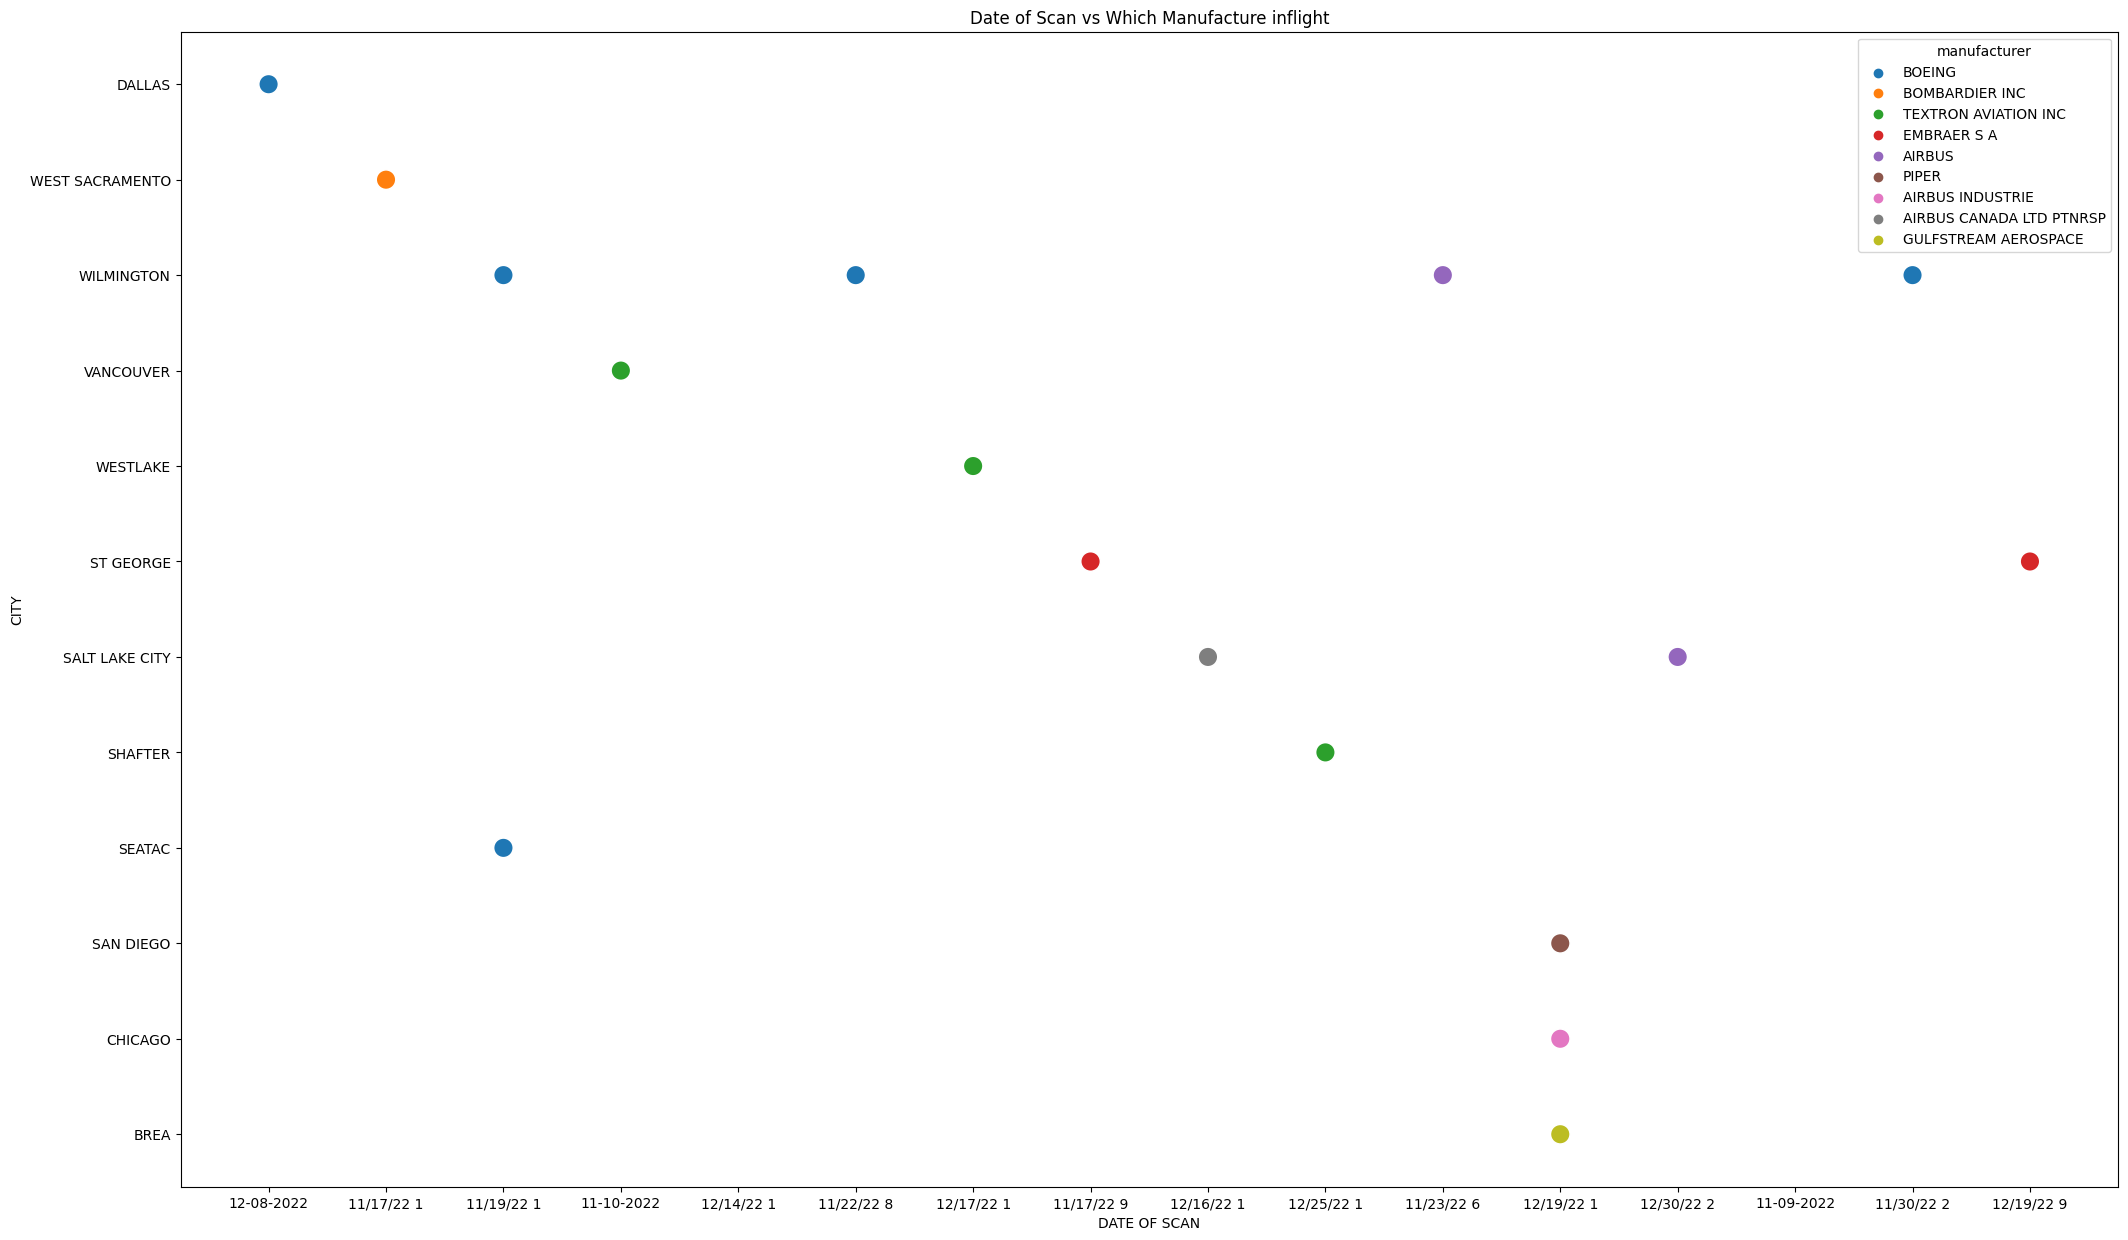

In [12]:
plt.figure(figsize=(25, 15))
plt.title('Date of Scan vs Which Manufacture inflight')
plt.ylabel('CITY')
plt.xlabel('DATE OF SCAN')
sns.scatterplot(x=airline20_df.spotted, y=airline20_df.reg_city, hue=airline20_df.manufacturer, s=200);

The above graph is quite self - explanatory. 
One observation that can we make from the above diagram is on 26th December, PLATUS and MOONEY are in-flight and scanned on the same date flying over different Cities !

## Q5. Can you show which Model is flying at what speed over which City ?

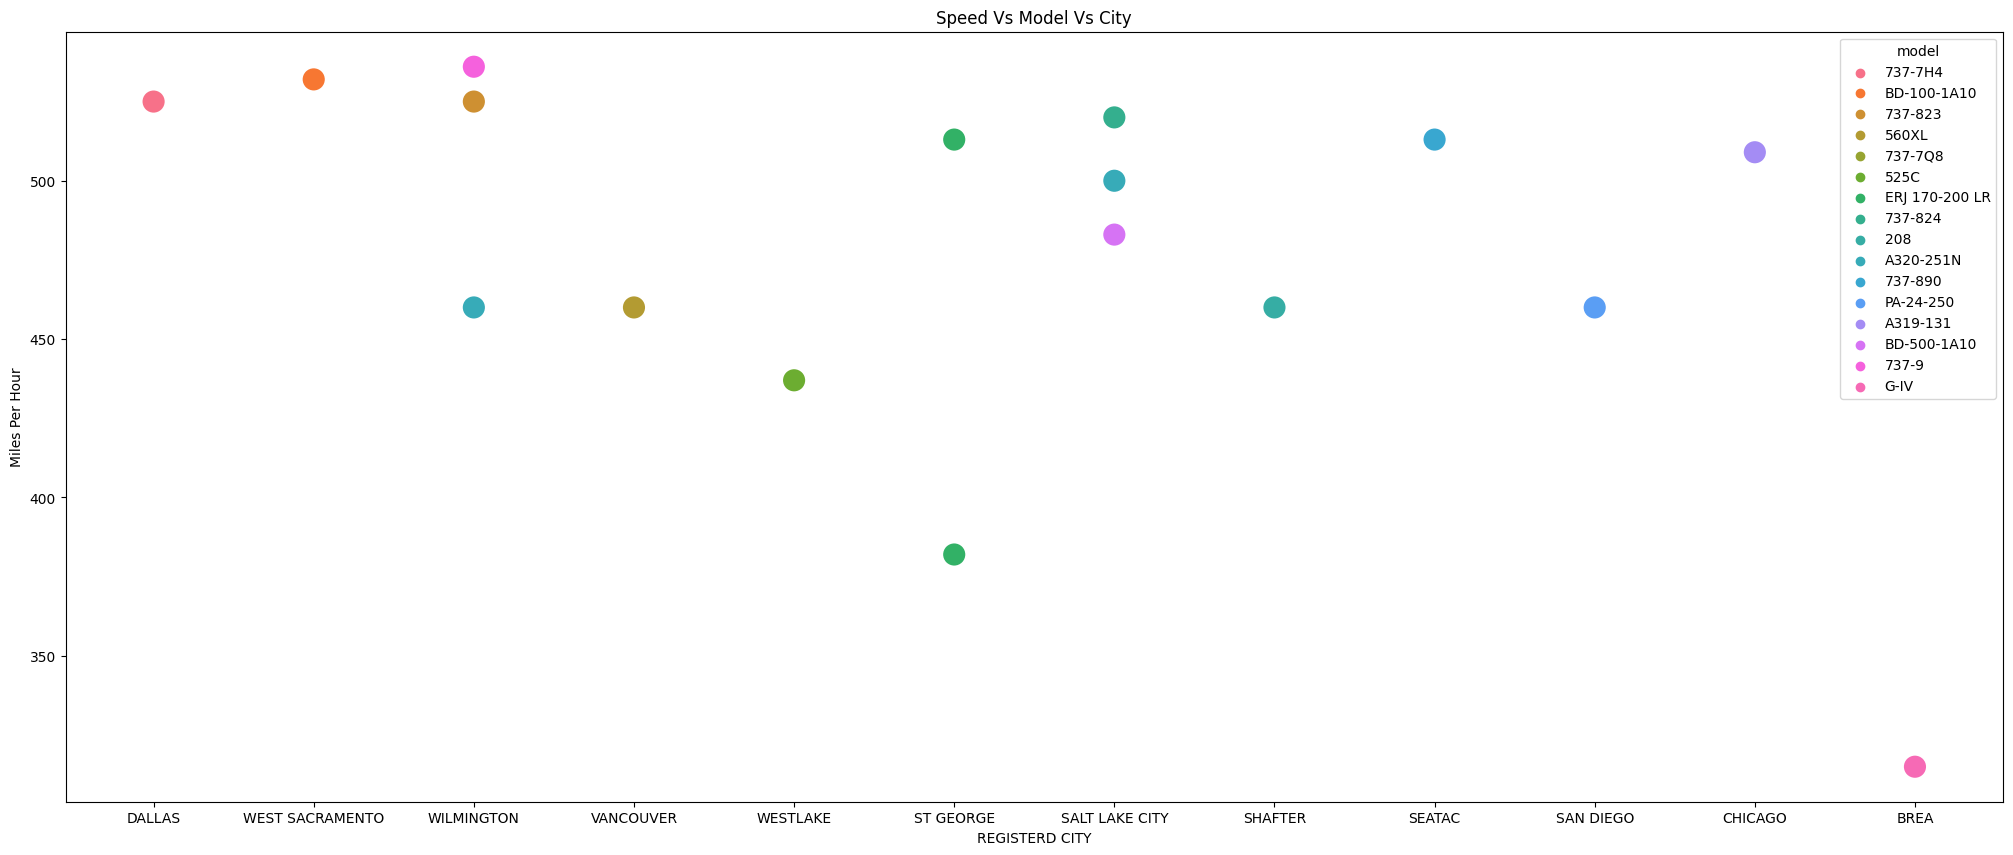

In [13]:
plt.figure(figsize=(25,10))
plt.title('Speed Vs Model Vs City')
plt.xlabel('REGISTERD CITY')
plt.ylabel('Miles Per Hour')
sns.scatterplot(x=airline20_df.reg_city, y = airline20_df.mph, hue = airline20_df.model, s=300);

Here, we can see that Model 747-47UF is flying at the highest speed of over 500 mph over city Purchase, NY.

## Lets take an even smaller sample 

In [14]:
airline_sample10_df = airlines_df.sample(10)

Lets make a descending order list with respect with the in-flight speed and analyze ....

In [15]:
mph_descend_df = airline_sample10_df.sort_values(['mph'], ascending = False)
mph_descend_df

,flight,tail_number,long,lat,alt,manufacturer,model,reg_expiration,reg_owner,reg_city,reg_state,mph,spotted
28280,GRP90,N906MM,-117.463,34.6920,28475,GULFSTREAM AEROSPACE,GIV-X (G450),12/31/24,M6 CARSON LLC,LAS VEGAS,NEVADA,543,01-02-2023
13680,AAL686,N926NN,-117.921,34.6026,34825,BOEING,737-823,5/31/25,WELLS FARGO TRUST CO NA TRUSTEE,SALT LAKE CITY,UTAH,527,12-02-2022
4408,SWA1320,N7821L,-117.707,34.5426,38825,BOEING,737-7CT,12/31/23,SOUTHWEST AIRLINES CO,DALLAS,TEXAS,525,11/16/22 5
17415,N314SG,N314SG,-117.999,34.6002,40525,LEARJET INC,31A,11/30/24,TVPX AIRCRAFT SOLUTIONS INC TRUSTEE,NORTH SALT LAKE,UTAH,520,12-10-2022
8789,EJM89,N899BC,-118.579,34.6060,37975,DASSAULT,FALCON 2000EX,12/31/23,THABIT HOLDING CO LLC,SHERMAN OAKS,CALIFORNIA,516,11/23/22 1
9371,N948HF,N948HF,-118.750,34.8467,40400,CESSNA,525C,10/31/23,VENTANA ASSOCIATES LLC,SALINAS,CALIFORNIA,495,11/25/22 7
16598,N821VV,N821VV,-118.347,34.8553,14350,BEECH,C90,12/31/24,TUNNELL DARRELL E,VISALIA,CALIFORNIA,460,12-08-2022
2043,TWY131,N131DS,-118.509,34.9132,27525,GULFSTREAM AEROSPACE CORP,GVI (G650ER),5/31/24,DS V AVIATION LLC,SAN DIEGO,CALIFORNIA,460,11-11-2022
5068,PCM8683,N713FX,-118.192,34.6703,10500,CESSNA,208B,11/30/23,FEDERAL EXPRESS CORPORATION,MEMPHIS,TENNESSEE,460,11/17/22 8
19942,N364BC,N364BC,-118.176,34.6774,23075,CESSNA,525A,3/31/24,NII AERO LLC,SEATTLE,WASHINGTON,444,12/15/22 1


## Q6. Can you show in a Line graph which manufactured aircraft is flying a high speed ?

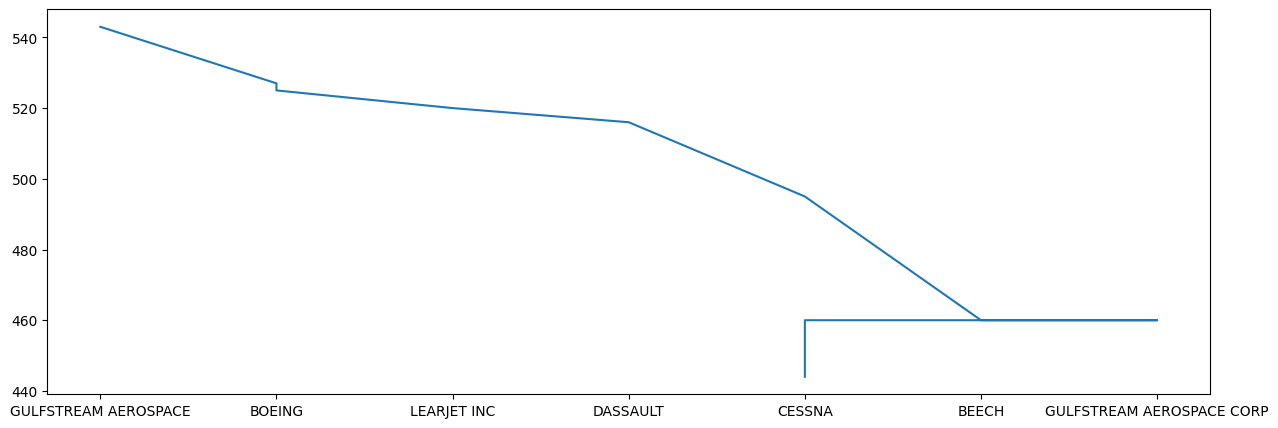

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(mph_descend_df.manufacturer, mph_descend_df.mph)

Here, we can see that BOEING is flying at the most speed of over 525 mph

## Q7. Over which cities, an aircraft is the highest altitude ?

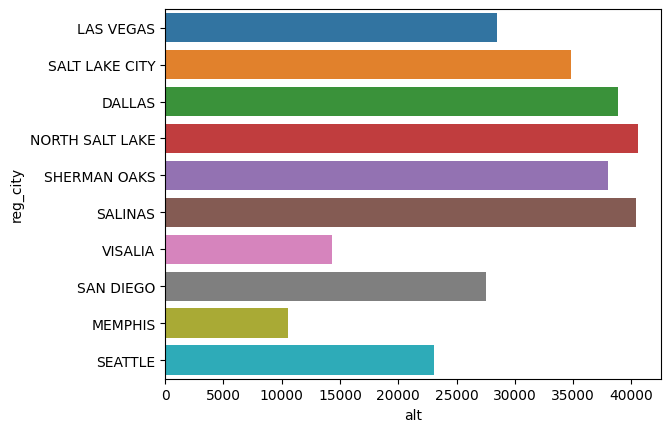

In [17]:
sns.barplot(x=mph_descend_df.alt,y = mph_descend_df.reg_city);

We can observe from above that over city SALINAS, an aircraft is at the highest altitude !

In [18]:
import jovian

In [19]:
jovian.commit(project='python-matplotlib-data-visualization')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddharthpersonalblog/python-matplotlib-data-visualization" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/siddharthpersonalblog/python-matplotlib-data-visualization


'https://jovian.com/siddharthpersonalblog/python-matplotlib-data-visualization'